In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [4]:
data = pd.read_csv("D:\\Anaconda\\T Mobile\\Telcochurn\\WA_Fn-UseC_-Telco-Customer-Churn.csv", na_values=" ")

In [5]:
data2 = data

In [6]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


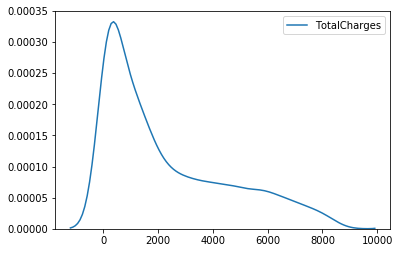

In [7]:
sns.kdeplot(data.TotalCharges);

#Total charges is right skewed 
# filling 11 missing values with median


In [9]:
data.TotalCharges = data.TotalCharges.fillna(data.TotalCharges.median()) 

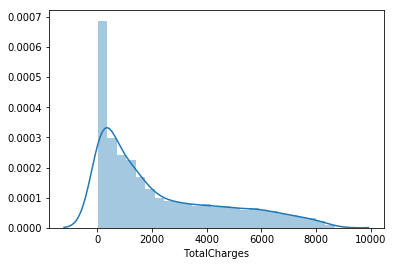

In [22]:
sns.distplot(data.TotalCharges);

In [23]:
data.dtypes

customerID            int64
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [10]:
data.SeniorCitizen = data.SeniorCitizen.astype("object")

In [25]:
data.dtypes

customerID            int64
gender                int64
SeniorCitizen        object
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [11]:
data = data.drop(["customerID"], axis = 1)

In [12]:
df = data['gender'].value_counts()
df.columns = ['gender', 'count']
print(df)


Male      3555
Female    3488
Name: gender, dtype: int64


In [28]:
for i in data:
    if(data[i].dtypes =="object"):
        df_table =  data[i].value_counts()
         #temp = pd.crosstab([df[i]], columns= "")
        df_table.columns = [data[i],'count']
        print(df_table,"\n\n","   ")
        

0    5901
1    1142
Name: SeniorCitizen, dtype: int64 

    


# Univariate plotting

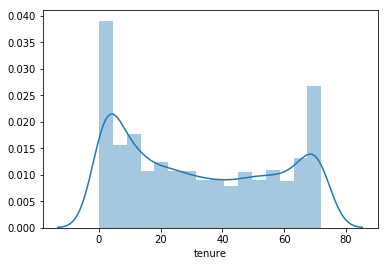

In [29]:
#Plotting univariate plots to visualize distribution of dataset
sns.distplot(data.tenure)

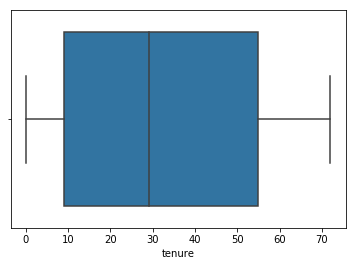

In [30]:
sns.boxplot(data.tenure)
#no outlier

In [31]:
normalized_tenure = (data.tenure-min(data.tenure))/(max(data.tenure)-min(data.tenure))

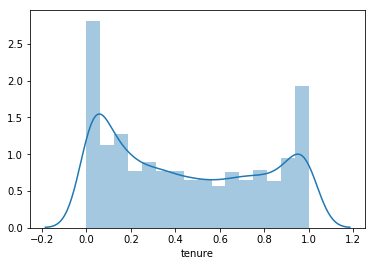

In [32]:
sns.distplot(normalized_tenure)

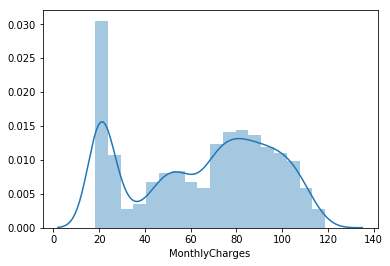

In [33]:
sns.distplot(data.MonthlyCharges)

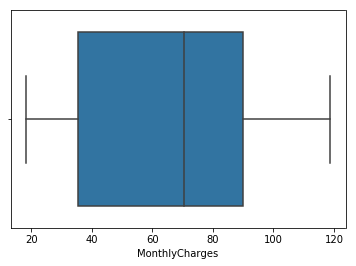

In [34]:
sns.boxplot(data.MonthlyCharges)
#no outlier

In [35]:
normalized_MonthlyCharges = (data.MonthlyCharges-min(data.MonthlyCharges))/(max(data.MonthlyCharges)-min(data.MonthlyCharges))

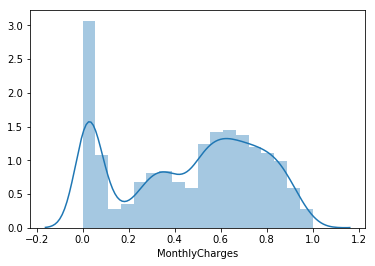

In [36]:
sns.distplot(normalized_MonthlyCharges)

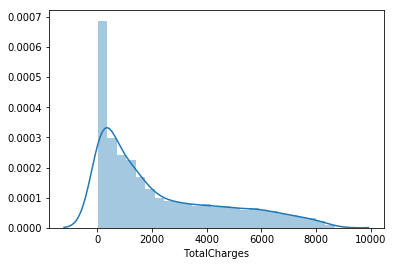

In [37]:
sns.distplot(data.TotalCharges)

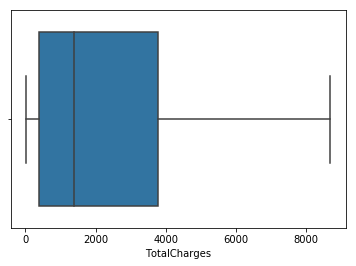

In [38]:
sns.boxplot(data.TotalCharges)
#no outlier

In [39]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [40]:
data_corr = data[["tenure","MonthlyCharges","TotalCharges"]]

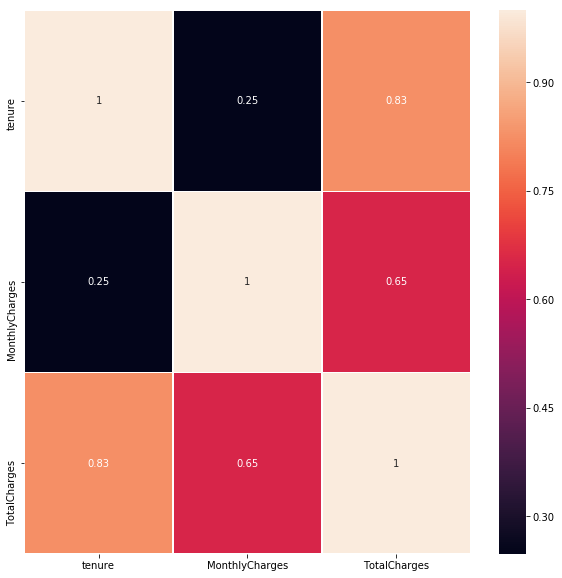

In [41]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(data_corr.corr(), annot= True,linewidths=.5, ax=ax)

# We can remove the totalcharges as it is strongly correlated with tenure and monthly charges
# But let's keep it and check the model

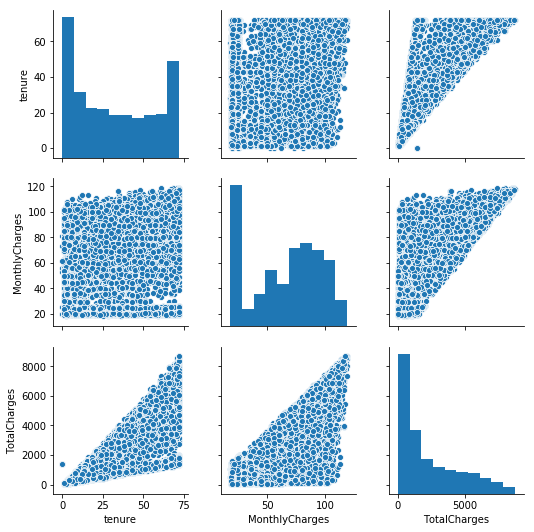

In [42]:
data2 = data [["tenure","MonthlyCharges","TotalCharges"]]
sns.pairplot(data2)

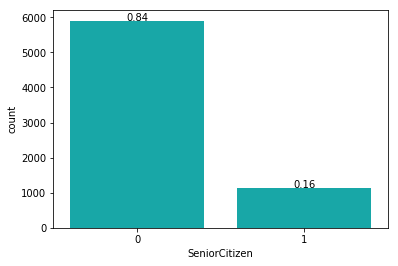

In [43]:
total = float(len(data)) 
for i in data.select_dtypes(["object"]):
    ax= sns.countplot(x=data[i], data=data, color="c");
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")
    plt.show()
    

In [44]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Bivariate plotting

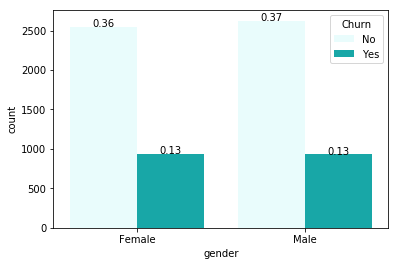

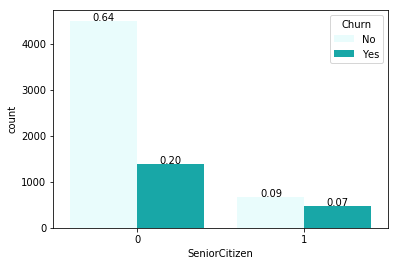

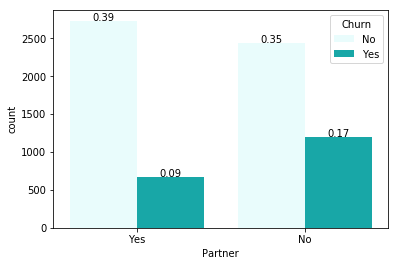

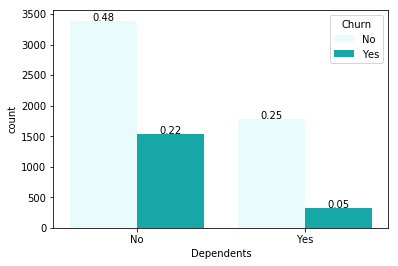

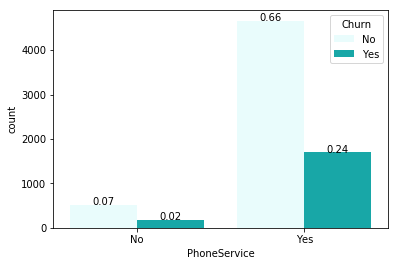

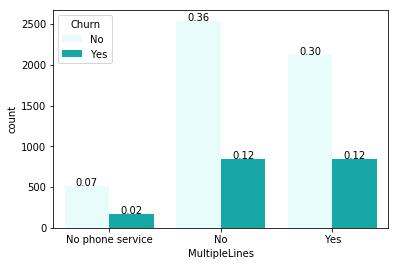

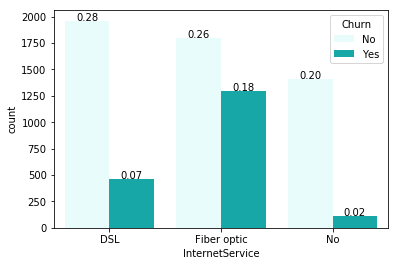

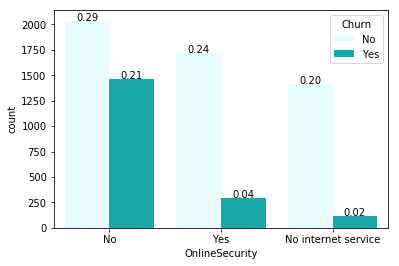

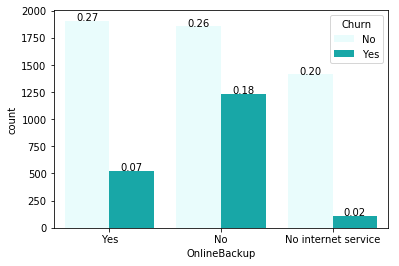

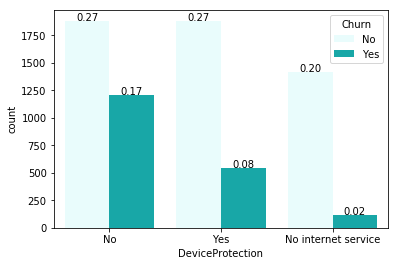

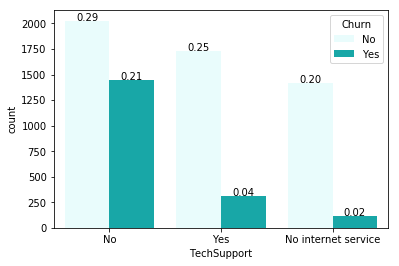

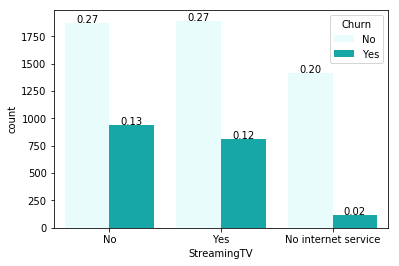

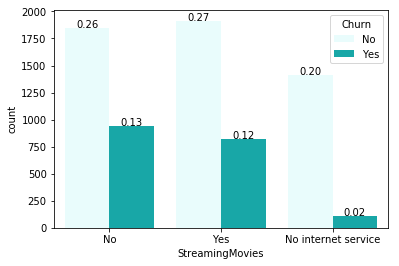

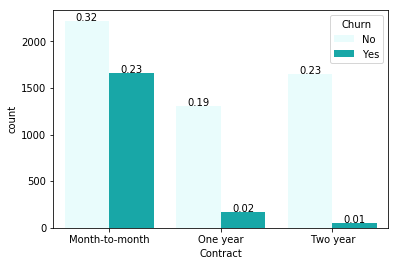

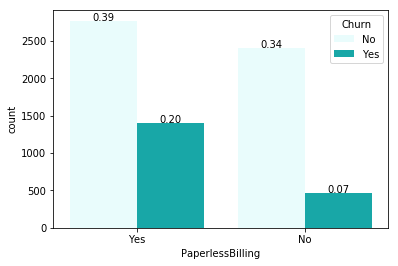

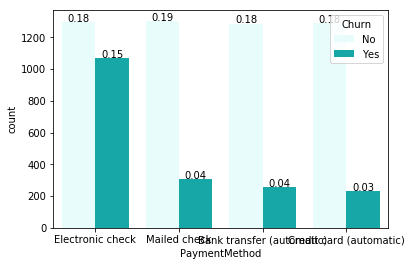

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


ValueError: cannot convert float NaN to integer

<Figure size 432x288 with 1 Axes>

In [32]:
total = float(len(data)) 
for i in data.select_dtypes(["object"]):
    ax= sns.countplot(x=data[i],hue ="Churn", data=data, color="c");
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")
    plt.show()
    

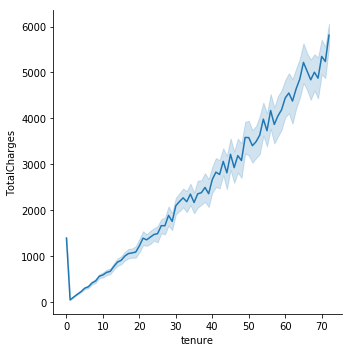

In [33]:
sns.relplot(x="tenure", y="TotalCharges", kind="line", data=data);

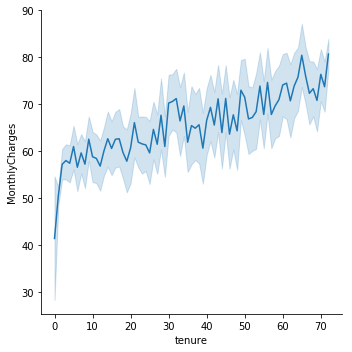

In [34]:
sns.relplot(x="tenure", y="MonthlyCharges", kind="line", data=data);

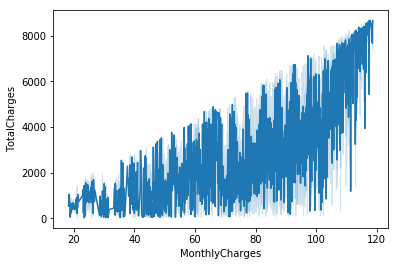

In [35]:
sns.lineplot(x="MonthlyCharges", y="TotalCharges", data=data);

In [36]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Plotting churn wrt to different variables

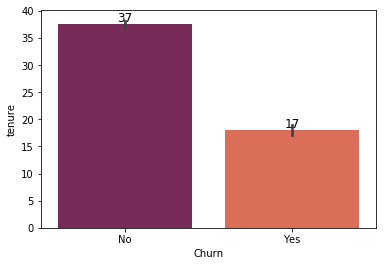

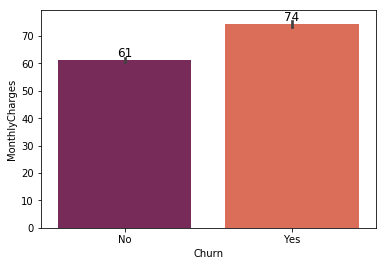

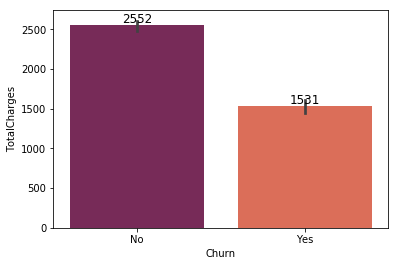

In [37]:
total = float(len(data)) 
for i in data.select_dtypes(include= ["int64","float64"]):
    ax= sns.barplot(x = "Churn",y= data[i],   palette="rocket", data=data);
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

    plt.show()
   
    

In [13]:
#Encoding categorical variables

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
#housing_object = housing_data_copy_price_notnull.select_dtypes(include=['object','category'])
for i in data.select_dtypes(include=['object']):
    data[i]=lb_make.fit_transform(data[i])


In [14]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [15]:
data_export_for_model_input = data.iloc[0:10,]

In [ ]:
data_export_for_model_input.to_csv(D:\\Anaconda\\T Mobile\\Telcochurn\\data_export_for_model_input.csv)

In [46]:
from sklearn.naive_bayes import MultinomialNB

In [47]:
clf = MultinomialNB()

In [48]:
clf.get_params

<bound method BaseEstimator.get_params of MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)>

In [49]:
y = data.Churn 
X = data.drop(labels = ['Churn'],axis = 1)

In [112]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [113]:
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [114]:
predictions = clf.predict(X_test)

In [115]:
predictions[1:10]

array([0, 1, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

In [116]:
len(y_test)

2113

In [117]:
# Print results to evaluate model
print("Showing Performance Metrics for Naive Bayes Multinomial\n")
print ("Training Accuracy: {}".format(clf.score(X_train, y_train)))

print ("Testing Accuracy: {}".format(accuracy_score(y_test, predictions)))


Showing Performance Metrics for Naive Bayes Multinomial

Training Accuracy: 0.6572008113590264
Testing Accuracy: 0.6601987695220066


In [118]:
from sklearn.model_selection import train_test_split, cross_val_score
print("Cross Validation Accuracy: \n")
cv_accuracy = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10)
print("Accuracy using 10 folds: ")
print(cv_accuracy.mean())

Cross Validation Accuracy: 

Accuracy using 10 folds: 
0.6574091258728816


In [119]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predictions, labels = [0,1])
print(confusion_matrix)


#here total correct prediction are 996 + 399 and total incorrect predictions are 589 + 129

[[996 589]
 [129 399]]


In [120]:
996+589+129+399

# Total observations which are used for predictions

2113

In [121]:
#Problem Statement/ Aim : To classify churn correctly such that churn observations shall not be classified as no churn observations
# i.e false negatives should be low.

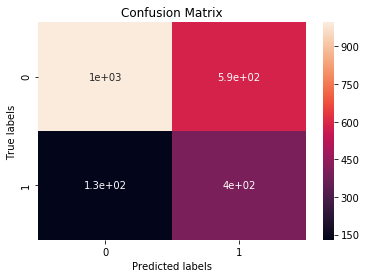

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix, annot= True,  ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); 
ax.yaxis.set_ticklabels(['0', '1']);

In [123]:
'''
Classification Rate/Accuracy:
Accuracy = (TP + TN) / (TP + TN + FP + FN)= (100+50) /(100+5+10+50)= 0.90

Recall: Recall gives us an idea about when it’s actually yes, how often does it predict yes.
Recall=TP / (TP + FN)

Precision: Precsion tells us about when it predicts yes, how often is it correct.
Precision = TP / (TP + FP)

F-measure:Since we have two measures (Precision and Recall) it helps to have a measurement that represents both of them.
Fmeasure=(2*Recall*Precision)/(Recall+Presision)


High recall, low precision:This means that most of the positive examples are correctly recognized (low FN) but there are a lot of false positives.

Low recall, high precision:This shows that we miss a lot of positive examples (high FN) but those we predict as positive are indeed positive (low FP)

'''

'\nClassification Rate/Accuracy:\nAccuracy = (TP + TN) / (TP + TN + FP + FN)= (100+50) /(100+5+10+50)= 0.90\n\nRecall: Recall gives us an idea about when it’s actually yes, how often does it predict yes.\nRecall=TP / (TP + FN)\n\nPrecision: Precsion tells us about when it predicts yes, how often is it correct.\nPrecision = TP / (TP + FP)\n\nF-measure:Since we have two measures (Precision and Recall) it helps to have a measurement that represents both of them.\nFmeasure=(2*Recall*Precision)/(Recall+Presision)\n\n\nHigh recall, low precision:This means that most of the positive examples are correctly recognized (low FN) but there are a lot of false positives.\n\nLow recall, high precision:This shows that we miss a lot of positive examples (high FN) but those we predict as positive are indeed positive (low FP)\n\n'

In [124]:
print('Precision, Recall and f-1 Scores for Naive Bayes Multinomial\n')
print(classification_report(y_test, predictions))


# Considering the churn condition(i.e churn =1 ), it has low precision and high recall.
# This means no. of false positives are more as compared to no. of false negatives
# Precision: This tells that our model has more false positives, is falsely classifying more* 'no churn' cases into 'churn' cases 
# Recall : This tells that our model has less false negatives, and is lessly classifying churn cases into no churn cases
# Thus it is good for the model as per the problem statement.



Precision, Recall and f-1 Scores for Naive Bayes Multinomial

             precision    recall  f1-score   support

          0       0.89      0.63      0.74      1585
          1       0.40      0.76      0.53       528

avg / total       0.77      0.66      0.68      2113



In [125]:
'''
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
y_scores = cross_val_predict(classifier, x_train, y_train, cv=3,
                             method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
'''

'\nfrom sklearn.model_selection import cross_val_predict\nfrom sklearn.metrics import precision_recall_curve\ny_scores = cross_val_predict(classifier, x_train, y_train, cv=3,\n                             method="decision_function")\nprecisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)\n'

In [126]:
#Kappa statistics
'''
The idea herein being, with unbalanced data, there is a higher chance you will randomly classify the less common group
so this should be accounted for in your evaluation of the model. If you dataset is balanced, you have much more flexibility 
with your performance metrics. It is important to keep in mind that Kappa is not always the best metric. 
'''

from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, predictions)

# .29 kappa statistics tells there is a fair agreement between actual and predicted classes

0.2976166445985612

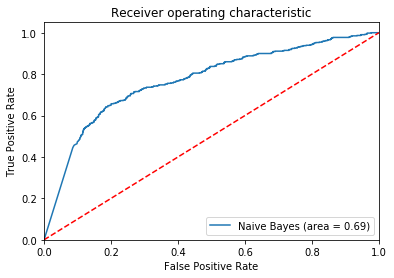

In [127]:
#ROC curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Naive_ROC')
plt.show()

In [ ]:
# Hyper parameter tuning that is alpha in naive bayes

# Grid Search for naive bayes

In [169]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
#housing_object = housing_data_copy_price_notnull.select_dtypes(include=['object','category'])
for i in data_internet_service.select_dtypes(include=['object']):
    data_internet_service[i]=lb_make.fit_transform(data_internet_service[i])

In [189]:
from sklearn.model_selection import GridSearchCV
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])

model = MultinomialNB()

grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))

grid.fit(X_train, y_train)

print(grid)

GridSearchCV(cv=None, error_score='raise',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)


In [190]:
print("Best Grid Score:",grid.best_score_)
print("Best Grid Alpha parameter:",grid.best_estimator_.alpha)

# so for alpha = 1, model has been built up already.

Best Grid Score: 0.6601123595505618
Best Grid Alpha parameter: 1.0


# Randomized search for naive bayes

In [56]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_rand

In [57]:
param_grid = {'alpha': sp_rand()}

model = MultinomialNB()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100)
rsearch.fit(X_train, y_train)
print(rsearch)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
          fit_params=None, iid=True, n_iter=100, n_jobs=1,
          param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000019739C02BA8>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)


In [58]:
#Optimum alpha from random search

print("The Optimum Aplha values",rsearch.best_params_)

The Optimum Aplha values {'alpha': 0.03525139268164501}


In [66]:
# summarize the results of the random parameter search

print("Best Score:",rsearch.best_score_)
print("Best Aplha Value:",rsearch.best_estimator_.alpha)

Best Score: 0.6574036511156187
Best Aplha Value: 0.03525139268164501


In [67]:
Y = rsearch.predict(X_test)


In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, Y, labels = [0,1])
print(confusion_matrix)

[[996 589]
 [129 399]]


In [69]:
print('Precision, Recall and f-1 Scores for Naive Bayes Multinomial\n')
print(classification_report(y_test, predictions))



Precision, Recall and f-1 Scores for Naive Bayes Multinomial

             precision    recall  f1-score   support

          0       0.89      0.63      0.74      1585
          1       0.40      0.76      0.53       528

avg / total       0.77      0.66      0.68      2113



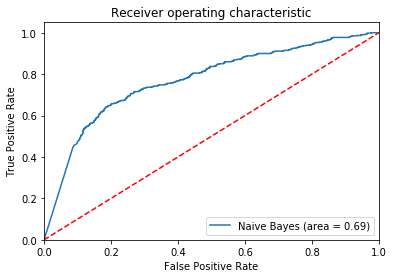

In [72]:
#ROC curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, rsearch.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rsearch.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Naive_ROC')
plt.show()

# Random forest

In [93]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_rand


from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from pprint import pprint

In [94]:
# Creating a model

rf = RandomForestClassifier()

In [95]:
# Look at parameters used by our current forest

print('Parameters currently in use:\n')

pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [96]:
model = rf.fit(X_train,y_train)

In [97]:
prediction_randomforest = model.predict(X_test)

In [98]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, prediction_randomforest)
print(confusion_matrix)


[[1415  170]
 [ 268  260]]


In [101]:
print('Precision, Recall and f-1 Scores for base model of random forest\n')
print(classification_report(y_test, prediction_randomforest))

# fscore of random forest is better than naive bayes model
# however our aim to get lower precision then recall doesn't hold true here

Precision, Recall and f-1 Scores for base model of random forest

             precision    recall  f1-score   support

          0       0.84      0.89      0.87      1585
          1       0.60      0.49      0.54       528

avg / total       0.78      0.79      0.79      2113



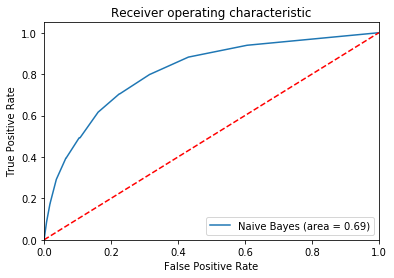

In [100]:
#ROC curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Random_forest_Roc')
plt.show()

# Random grid for random forest

In [76]:
#We will try adjusting the following set of hyperparameters:

#n_estimators = number of trees in the foreset

#max_features = max number of features considered for splitting a node

#max_depth = max number of levels in each decision tree

#min_samples_split = min number of data points placed in a node before the node is split

#min_samples_leaf = min number of data points allowed in a leaf node

#bootstrap = method for sampling data points (with or without replacement)

In [77]:
#Creating random hyper parameter grid

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
#The Max Depth value cannot exceed 30 on a 32-bit machine. 

#max_depth = [int(x) for x in np.linspace(5, 30, num = 8)]
#max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [78]:
pprint(random_grid)

{'bootstrap': [True, False],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50, 66, 83, 100, 116, 133, 150, 166, 183, 200]}


In [79]:
#The benefit of a random search is that we are not trying every combination, 
#but selecting at random to sample a wide range of values.

In [103]:
#Now, we instantiate the random search and fit it like any Scikit-Learn model:

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf2 = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf2, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   17.6s finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [50, 66, 83, 100, 116, 133, 150, 166, 183, 200], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [104]:
prediction_randomgrid_randomforest = rf_random.predict(X_test)

In [105]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, prediction_randomgrid_randomforest)
print(confusion_matrix)


[[1428  157]
 [ 233  295]]


In [106]:
print('Precision, Recall and f-1 Scores for base model of random forest\n')
print(classification_report(y_test, prediction_randomgrid_randomforest))

Precision, Recall and f-1 Scores for base model of random forest

             precision    recall  f1-score   support

          0       0.86      0.90      0.88      1585
          1       0.65      0.56      0.60       528

avg / total       0.81      0.82      0.81      2113



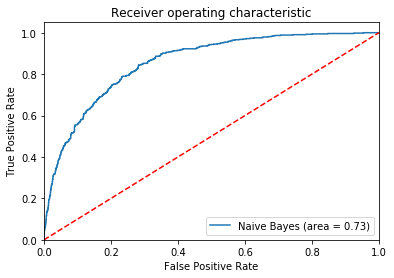

In [107]:
#ROC curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, rf_random.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf_random.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Random_forest_Roc')
plt.show()

In [129]:
# dumping model as pickle file
from sklearn.externals import joblib

joblib.dump(clf, "model_naivebayes_entropy.pkl")

['model_naivebayes_entropy.pkl']